Olá **Cientista**!

Bem vinda e bem vindo ao **mega desafio do Módulo 01**, neste desafio queremos que você aplique tudo que aprendeu no curso, analisando uma outra informação ~~referente a base de dados de [produção hospitalar](http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi), seja número de internação, óbito, AIH ou taxa de mortalidade.~~ 

**P.S: Infelizmente o DataSUS está fora do ar por tempo indeterminado, para você não parar seu projeto, adicionamos no [GitHub](https://github.com/alura-cursos/agendamento-hospitalar/tree/main/dados) do curso, duas novas bases para você utilizar neste projeto (COVID-19 e Óbitos).**

Uma base é dos **casos de COVID-19 baixadas do projeto [BRASIL.IO](https://brasil.io/dataset/covid19/caso/)**, outra são os números de óbitos registrados no cartório civil desde 1970 retirado do **[Kaggle](https://www.kaggle.com/amandalk/registered-deaths-brazil)**.

Vocês podem escolher qualquer uma das duas bases de dados, a de COVID-19 é mais desafiadora e você vai precisar descompactar o arquivo por ser grande e entrar no site do Brasil.IO para entender todas as features presentes (No Brasil.IO tem diversas bases sobre COVID-19, estamos usando a chamada **Casos**). A base de óbito é mais simples e relativamente semelhate a utilizada no curso.

Algumas dicas para você mandar bem no desafio final, capriche nas análises, escreva suas conclusões e hipóteses (mesmo que resultado seja inconclusivo) e não esqueça de colocar um resumo dos pontos que julgar mais interessantes do seu projeto.



E para que o seu projeto tenha a oportunidade de ser avalido pelo Thiago G. Santos e Átila Iamarino, ao vivo na **live de revisão de projetos** submeta o link compartilhado do seu notebook [neste formulário](https://docs.google.com/forms/d/e/1FAIpQLSd1jemhvdo8sM6e-bgOryyZ2P3YuMO6E_mUQXabyBX_xhuZQQ/viewform?usp=sf_link) até dia 22/11 às 23h59.

Para facilitar a vida dos seus instrutores favoritos, no momento da correção, algumas dicas de como estruturar seu projeto:

- Como título do seu **Colab** coloque seu nome (Ex: Thiago_Gonçalves.ipynb)
- Crie um resumo das suas análises na parte superior do notebook
- Informe no resumo os dados que vc vai analisar (Ex: Finaceiros e Internações)

Qualquer dúvida não deixe de perguntar no Discord, compatilhe seu projeto nas redes sociais e crie um repositório no github, esse é o início do seu portifólio em Data Science.



Fique a vontade para utilizar esse notebook como template projeto.



## Resumo:



***Faça aqui o resumo das suas analises, destacando os pontos principais do seu projeto***

***Pesquisa***
Fonte: Secretarias de Saúde das Unidades Federativas, dados tratados por Álvaro Justen e colaboradores/Brasil.IO.https://github.com/turicas/covid19-br/blob/master/api.md#casos

Fonte: IBGE https://www.ibge.gov.br/estatisticas/sociais/populacao/9103-estimativas-de-populacao.html?=&t=resultados


---
Estudos e hipóteses
1. Verificar a frequência dos casos registrados por estados UF




2.   List item



## Análise dos dados:

***Inicie aqui o desenvolvimento do seu projeto, não esqueça de adicionar textos curtos e objetivos para que os avaliadores entendam sua linha de raciocínio e as conclusões que você está chegando crie uma narrativa convincente e coerênte aos dados analisados.***

# Bibliotecas:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker


# Visualizando os dados caso.csv:

In [ ]:
caso = pd.read_csv('caso.csv')
caso.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-05,AC,NaN,state,31248,697,234,True,881935.0,894470.0,12.0,3493.46540,0.0223
1,2020-11-04,AC,NaN,state,31218,696,233,False,881935.0,894470.0,12.0,3490.11146,0.0223
2,2020-11-03,AC,NaN,state,30962,695,232,False,881935.0,894470.0,12.0,3461.49116,0.0224
3,2020-11-02,AC,NaN,state,30954,693,231,False,881935.0,894470.0,12.0,3460.59678,0.0224
4,2020-11-01,AC,NaN,state,30951,693,230,False,881935.0,894470.0,12.0,3460.26138,0.0224


In [ ]:
caso.shape

(936870, 13)

## Colunas do DataFrame Caso.csv:



1.   date: data de coleta dos dados no formato YYYY-MM-DD

2.   state: sigla da unidade federativa, exemplo: SP.

3.   city: nome do município (pode estar em branco quando o registro é referente ao estado, pode ser preenchido com Importados/Indefinidos também).

4.   place_type: tipo de local que esse registro descreve, pode ser city ou state.

5.   confirmed: número de casos confirmados.

6.   deaths: número de mortes.

7.   order_for_place: número que identifica a ordem do registro para este local. O registro referente ao primeiro boletim em que esse local aparecer será contabilizado como 1 e os demais boletins incrementarão esse valor.

8.   is_last: campo pré-computado que diz se esse registro é o mais novo para esse local, pode ser True ou False (caso filtre por esse campo, use is_last=True ou is_last=False, não use o valor em minúsculas).

9.   estimated_population_2019: população estimada para esse município/estado em 2019, segundo o IBGE. ATENÇÃO: essa coluna possui valores desatualizados, prefira usar a coluna estimated_population.

10.  estimated_population: população estimada para esse município/estado em 2020, segundo o IBGE. 

11.   city_ibge_code: código IBGE do local.

12.   confirmed_per_100k_inhabitants: número de casos confirmados por 100.000 habitantes (baseado em estimated_population).

13.   death_rate: taxa de mortalidade (mortes / confirmados).


## Tipo das variáveis contidas no DataFrame Casos.csv:

In [ ]:
caso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936870 entries, 0 to 936869
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   date                            936870 non-null  object 
 1   state                           936870 non-null  object 
 2   city                            930535 non-null  object 
 3   place_type                      936870 non-null  object 
 4   confirmed                       936870 non-null  int64  
 5   deaths                          936870 non-null  int64  
 6   order_for_place                 936870 non-null  int64  
 7   is_last                         936870 non-null  bool   
 8   estimated_population_2019       933215 non-null  float64
 9   estimated_population            933215 non-null  float64
 10  city_ibge_code                  933215 non-null  float64
 11  confirmed_per_100k_inhabitants  919888 non-null  float64
 12  death_rate      

In [ ]:
#Data inicial dos dados coletados do casos registrados de Covid 19
caso['date'].min()

'2020-02-25'

In [ ]:
#Data final dos dados coletados do casos registrados de Covid 19
caso['date'].max()

'2020-11-05'

# 1. Verificar a frequência dos casos registrados por estados UF


---
##Pelos dados apresentados datado de 25/02/2020 à 05/11/2020, temos uma frequência de casos registrados com maior volume em Minas Gerais MG com 129.839 registros de casos de Covid 19. Seguido de São Paulo com 114.897 registros de casos de Covid 19.
##Segundo estimativa dos dados do IBGE 2020 o estado de Minas Gerais MG, tem um total de 21.292.666 de habitantes, sendo o segundo colocado no Brasil. Ou seja, Minas Gerais MG supera o estado mais populoso do pais que é São Paulo com um total de 46.289.333 habitantes segundo o IBGE 2020, em frequência de registros em casos do Covid 19.	 




In [ ]:
#verificando casos registrados por estados
caso_estado = caso['state'].value_counts()
caso_estado

MG    129839
SP    114897
RS     80731
BA     72566
PR     62364
SC     53179
GO     41065
MA     41062
PB     38848
PI     38160
CE     36657
PE     35663
PA     28025
RN     22799
TO     19440
AL     19077
RJ     18646
SE     13572
MS     12886
ES     12838
AM     12234
MT     11983
RO      8942
AC      4247
AP      3327
RR      3114
DF       709
Name: state, dtype: int64

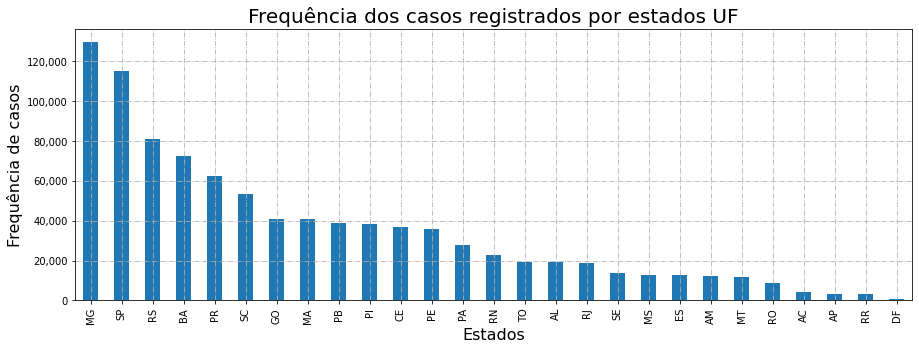

In [ ]:
# grafico de frequencia de casos registrados diariamente por estados

plt.figure(figsize=(15,5))
ax = caso_estado.plot(kind='bar')
plt.xlabel('Estados',fontsize=16)
plt.ylabel('Frequência de casos', fontsize=16)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.grid(linestyle='-.')
plt.title('Frequência dos casos registrados por estados UF', fontsize=20)
plt.show()

#Tratamento arquivo IBGE com a população estimada em 2020.

In [ ]:
#lendo arquivo xls do IBGE com estimatica da população em 2020
#eliminando titulo da planilha
#eliminando observações no rodapé

populacao_ibge_2020 = pd.read_excel('estimativa_dou_2020.xls', skiprows=1, skipfooter=7)
populacao_ibge_2020

,BRASIL E UNIDADES DA FEDERAÇÃO,Unnamed: 1,POPULAÇÃO ESTIMADA,Unnamed: 3
0,Brasil,NaN,211755692,NaN
1,Região Norte,NaN,18672591,NaN
2,Rondônia,NaN,1796460,NaN
3,Acre,NaN,894470,NaN
4,Amazonas,NaN,4207714,NaN
5,Roraima,NaN,631181,NaN
6,Pará,NaN,8690745,NaN
7,Amapá,NaN,861773,NaN
8,Tocantins,NaN,1590248,NaN
9,Região Nordeste,NaN,57374243,NaN


In [ ]:
#eliminando total do Brasil e total das Regiões

populacao_ibge_2020.drop([0,1,9,19,24,28],inplace=True)
populacao_ibge_2020

,BRASIL E UNIDADES DA FEDERAÇÃO,Unnamed: 1,POPULAÇÃO ESTIMADA,Unnamed: 3
2,Rondônia,NaN,1796460,NaN
3,Acre,NaN,894470,NaN
4,Amazonas,NaN,4207714,NaN
5,Roraima,NaN,631181,NaN
6,Pará,NaN,8690745,NaN
7,Amapá,NaN,861773,NaN
8,Tocantins,NaN,1590248,NaN
10,Maranhão,NaN,7114598,NaN
11,Piauí,NaN,3281480,1.0
12,Ceará,NaN,9187103,1.0


In [ ]:
#verificando quantidade de estados UF
populacao_ibge_2020.shape

(27, 4)

In [ ]:
#criando index por estado UF

populacao_ibge_2020.set_index('BRASIL E UNIDADES DA FEDERAÇÃO', inplace=True)

populacao_ibge_2020

,Unnamed: 1,POPULAÇÃO ESTIMADA,Unnamed: 3
BRASIL E UNIDADES DA FEDERAÇÃO,,,
Rondônia,NaN,1796460,NaN
Acre,NaN,894470,NaN
Amazonas,NaN,4207714,NaN
Roraima,NaN,631181,NaN
Pará,NaN,8690745,NaN
Amapá,NaN,861773,NaN
Tocantins,NaN,1590248,NaN
Maranhão,NaN,7114598,NaN
Piauí,NaN,3281480,1.0


In [ ]:
#Ordenando por UF a tabela de população do IBGE

populacao_ibge_2020.sort_values(by='POPULAÇÃO ESTIMADA',ascending=False)

,Unnamed: 1,POPULAÇÃO ESTIMADA,Unnamed: 3
BRASIL E UNIDADES DA FEDERAÇÃO,,,
São Paulo,NaN,46289333,NaN
Minas Gerais,NaN,21292666,NaN
Rio de Janeiro,NaN,17366189,NaN
Bahia,NaN,14930634,3.0
Paraná,NaN,11516840,NaN
Rio Grande do Sul,NaN,11422973,NaN
Pernambuco,NaN,9616621,2.0
Ceará,NaN,9187103,1.0
Pará,NaN,8690745,NaN


#Grafico estimativa da população segundo o IBGE 2020

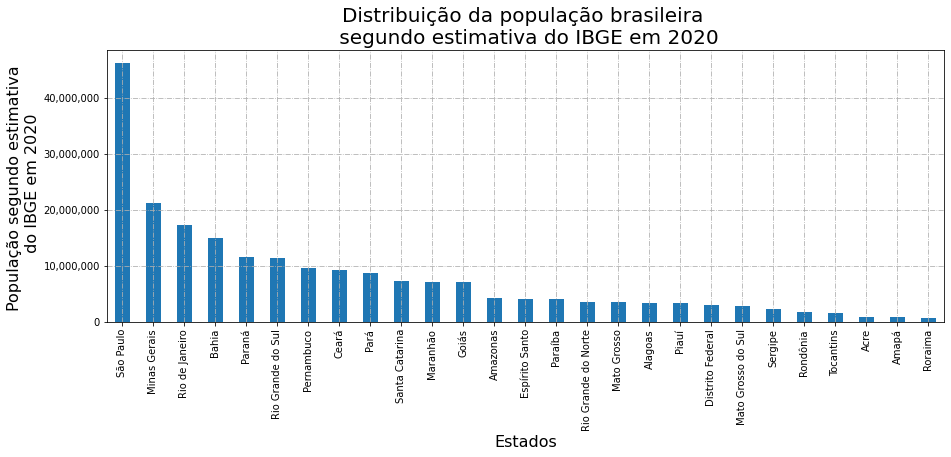

In [ ]:
plt.figure(figsize=(15,5))
ax = populacao_ibge_2020['POPULAÇÃO ESTIMADA'].sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Estados',fontsize=16)
plt.ylabel('População segundo estimativa \n do IBGE em 2020', fontsize=16)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.grid(linestyle='-.')
plt.title('Distribuição da população brasileira \n segundo estimativa do IBGE em 2020', fontsize=20)
plt.show()